# Date Alignment

In [1]:
import glob
import os
import pandas as pd

# Path to CSV files
csv_directory = '../data/yfinance_data/yfinance_data/'

# Verify the directory and files
print("Directory contents:", os.listdir(csv_directory))
csv_files = glob.glob(os.path.join(csv_directory, '*.csv'))
print("CSV files found:", csv_files)

# Load and concatenate all CSV files into one DataFrame
data_frames = [pd.read_csv(file) for file in csv_files]
if not data_frames:
    raise ValueError("No data frames to concatenate.")

combined_df = pd.concat(data_frames, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combined_df.head())

Directory contents: ['AAPL_historical_data.csv', 'AMZN_historical_data.csv', 'GOOG_historical_data.csv', 'META_historical_data.csv', 'MSFT_historical_data.csv', 'NVDA_historical_data.csv', 'TSLA_historical_data.csv']
CSV files found: ['../data/yfinance_data/yfinance_data\\AAPL_historical_data.csv', '../data/yfinance_data/yfinance_data\\AMZN_historical_data.csv', '../data/yfinance_data/yfinance_data\\GOOG_historical_data.csv', '../data/yfinance_data/yfinance_data\\META_historical_data.csv', '../data/yfinance_data/yfinance_data\\MSFT_historical_data.csv', '../data/yfinance_data/yfinance_data\\NVDA_historical_data.csv', '../data/yfinance_data/yfinance_data\\TSLA_historical_data.csv']
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  1057280

In [2]:
# Load and concatenate all CSV files into one DataFrame
data_frames = [pd.read_csv(file) for file in csv_files]
if not data_frames:
    raise ValueError("No data frames to concatenate.")

combined_df = pd.concat(data_frames, ignore_index=True)

# Display the column names 
print("Columns in combined_df:", combined_df.columns)

# Convert 'Date' column to datetime format
if 'Date' in combined_df.columns:
    combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors='coerce')  # Use errors='coerce' to handle any invalid date formats
    combined_df.set_index('Date', inplace=True)
else:
    print("Column 'Date' not found in the DataFrame.")

# Display the DataFrame structure to confirm it is ready for TA-Lib
print(combined_df.head())

Columns in combined_df: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  
Date                                 
1980-12-12        0.0           0.0  
1980-12-15        0.0           0.0  
1980-12-16        0.0           0.0  
1980-12-17        0.0           0.0  
1980-12-18        0.0           0.0  


In [3]:
import pandas as pd
import numpy as np
# import plotly.express as px
from IPython.display import display
from task.dataset_loader import load_raw_dataset
# import yfinance as yf
from datetime import datetime
from textblob import TextBlob


data = pd.read_csv("../data/raw_analyst_ratings.csv")
# Convert 'date' column to datetime format in the news data
data['date'] = pd.to_datetime(data['date'])

# Set 'date' as the index for the news DataFrame
data.set_index('date', inplace=True)

# Display the first few rows to verify
print(data.head())

            Unnamed: 0                                           headline  \
date                                                                        
2020-06-05           0            Stocks That Hit 52-Week Highs On Friday   
2020-06-03           1         Stocks That Hit 52-Week Highs On Wednesday   
2020-05-26           2                      71 Biggest Movers From Friday   
2020-05-22           3       46 Stocks Moving In Friday's Mid-Day Session   
2020-05-22           4  B of A Securities Maintains Neutral on Agilent...   

                                                          url  \
date                                                            
2020-06-05  https://www.benzinga.com/news/20/06/16190091/s...   
2020-06-03  https://www.benzinga.com/news/20/06/16170189/s...   
2020-05-26  https://www.benzinga.com/news/20/05/16103463/7...   
2020-05-22  https://www.benzinga.com/news/20/05/16095921/4...   
2020-05-22  https://www.benzinga.com/news/20/05/16095304/b...   

    

In [4]:
# Check for duplicate dates in the news DataFrame
duplicates = data.index.duplicated()
if duplicates.any():
    print("Duplicate dates found:")
    print(data.index[duplicates])

Duplicate dates found:
DatetimeIndex(['2020-05-22', '2020-05-22', '2020-05-22', '2020-05-22',
               '2020-05-22', '2020-05-22', '2020-05-22', '2020-05-22',
               '2020-05-21', '2020-05-21',
               ...
               '2013-07-29', '2013-07-26', '2013-07-25', '2013-07-15',
               '2013-06-18', '2013-06-14', '2013-06-04', '2013-06-04',
               '2013-05-02', '2013-03-22'],
              dtype='datetime64[ns]', name='date', length=1044634, freq=None)


In [5]:
# Drop duplicate dates, keeping the first occurrence
data = data[~data.index.duplicated(keep='first')]

In [6]:
# Check if the index is monotonic increasing
is_monotonic = data.index.is_monotonic_increasing
print(f"Index is monotonic increasing: {is_monotonic}")

# Check if the index is monotonic decreasing
is_monotonic = data.index.is_monotonic_decreasing
print(f"Index is monotonic decreasing: {is_monotonic}")

Index is monotonic increasing: False
Index is monotonic decreasing: False


In [7]:
# Sort the index of the news DataFrame
data = data.sort_index()

# Verify the index is now sorted
print(data.index.is_monotonic_increasing)

True


In [8]:
# Reindex news data to match the dates in the stock data (combined_df)
data = data.reindex(combined_df.index, method='nearest')

# Forward fill or backward fill any missing dates in the news data
data.fillna(method='ffill', inplace=True)
# Join the stock data (combined_df) with the news data on the Date index
merged_df = combined_df.join(data, how='inner')

# Display the first few rows of the merged DataFrame
print(merged_df.head())

                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  Unnamed: 0                      headline  \
Date                                                                            
1980-12-12        0.0           0.0      883755  How Treasuries and ETFs Work   
1980-12-15        0.0           0.0      883755  How Treasuries and ETFs Work   
1980-12-16        0.0           0.0      883755  How Treasuries and ETFs Work   
1980-12-17        0.0           0.0      883755  How Treasurie

C:\Users\eldiy\AppData\Local\Temp\ipykernel_13200\2324240017.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1048575 non-null  int64 
 1   headline    1048575 non-null  object
 2   url         1048575 non-null  object
 3   publisher   1048575 non-null  object
 4   date        1048575 non-null  object
 5   stock       1048575 non-null  object
dtypes: int64(1), object(5)
memory usage: 48.0+ MB


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241404 entries, 1980-12-12 to 2024-07-30
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Open             241404 non-null  float64
 1   High             241404 non-null  float64
 2   Low              241404 non-null  float64
 3   Close            241404 non-null  float64
 4   Adj Close        241404 non-null  float64
 5   Volume           241404 non-null  int64  
 6   Dividends        241404 non-null  float64
 7   Stock Splits     241404 non-null  float64
 8   Unnamed: 0       241404 non-null  int64  
 9   headline         241404 non-null  object 
 10  url              241404 non-null  object 
 11  publisher        241404 non-null  object 
 12  stock            241404 non-null  object 
 13  Sentiment_Score  241404 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 27.6+ MB


# Sentiment Analysis

In [9]:
# Perform sentiment analysis
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the headlines
merged_df['Sentiment_Score'] = merged_df['headline'].apply(get_sentiment_score)

# Verify that the new column is added
print(merged_df[['headline', 'Sentiment_Score']].head())

                                headline  Sentiment_Score
Date                                                     
1980-12-12  How Treasuries and ETFs Work              0.0
1980-12-15  How Treasuries and ETFs Work              0.0
1980-12-16  How Treasuries and ETFs Work              0.0
1980-12-17  How Treasuries and ETFs Work              0.0
1980-12-18  How Treasuries and ETFs Work              0.0


C:\Users\eldiy\AppData\Local\Temp\ipykernel_13200\4086227031.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


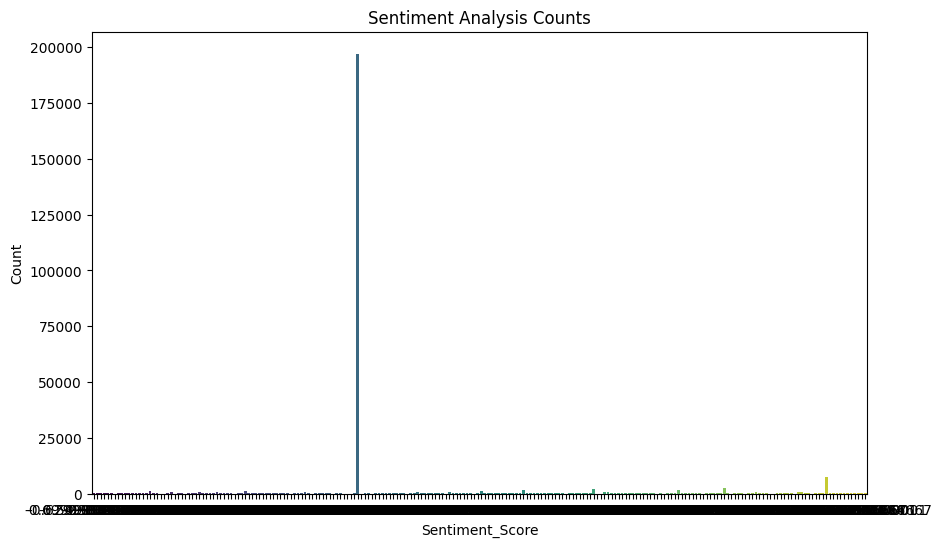

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count the occurrences of each sentiment
sentiment_counts = merged_df['Sentiment_Score'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Add titles and labels
plt.title('Sentiment Analysis Counts')
plt.xlabel('Sentiment_Score')
plt.ylabel('Count')

# Display the plot
plt.show()

# Calculate Daily Stock Returns

In [ ]:
# Calculate daily stock returns
merged_df['Daily_Return'] = merged_df['Close'].pct_change()

# Display the first few rows to check the daily return column
print(merged_df[['Close', 'Daily_Return']].head())

               Close  Daily_Return
Date                              
1980-12-12  0.128348           NaN
1980-12-15  0.121652     -0.052171
1980-12-16  0.112723     -0.073398
1980-12-17  0.115513      0.024751
1980-12-18  0.118862      0.028992


# Correlation Analysis

In [ ]:
# Correlate sentiment scores with daily stock returns
correlation = merged_df['Sentiment_Score'].corr(merged_df['Daily_Return'])

print(f"Correlation between sentiment scores and daily stock returns: {correlation}")

Correlation between sentiment scores and daily stock returns: 0.0012717938119758802
